# Preparação e tópicos em comum

In [1]:
### Import de bibliotecas usadas ###

#    Tratamento e manipulação de dados
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss

#    Modelos e métricas
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split,\
    RandomizedSearchCV,\
    GridSearchCV
from sklearn.metrics import accuracy_score,\
    precision_score,\
    recall_score,\
    f1_score,\
    confusion_matrix

#    Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#    Definição de seed para reprodutibilidade
seed = 42
np.random.seed(seed)

In [3]:
#    Configurações de plot para o projeto
%matplotlib inline
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120

In [4]:
#    Carregamento dos dados em memória
df_heart = pd.read_csv('heart_2020_cleaned.csv')
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


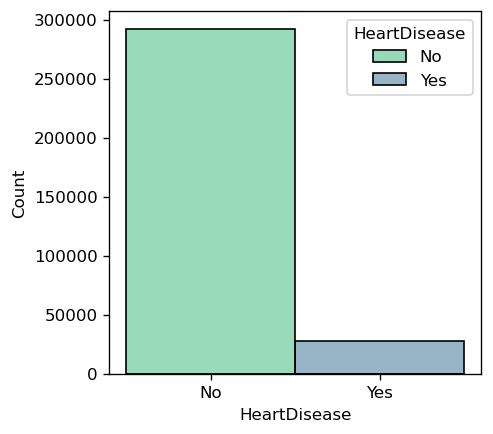

In [5]:
### Verifica a distribuição dos dados entre a classe alvo ###
img, axes = plt.subplots(1, 1, figsize=(4, 4))

sns.histplot(
    data=df_heart,
    x='HeartDisease',
    hue='HeartDisease',
    palette=sns.color_palette("viridis_r", 2)
)

plt.show()

#    Observações com dados da doença cardíaca representam
# menos de 10% do total do dataset.
#    Antes de se treinar o modelo deverá ser feito algum tipo
# de tratamento, como superamostragem da classe minoritária
# ou subamostragem da classe majoritária.

In [6]:
#     Conversão de variáveis categóricas em variáveis "dummies"
df_heart_dummies=pd.get_dummies(data=df_heart, drop_first=True)
df_heart_dummies.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [7]:
#    Escolha das colunas que serão usadas como input e
# output do modelo
target_column = ['HeartDisease_Yes']
input_columns = [
    'BMI',
    'PhysicalHealth',
    'MentalHealth',
    'SleepTime',
    'Smoking_Yes',
    'AlcoholDrinking_Yes',
    'Stroke_Yes',
    'DiffWalking_Yes',
    'Sex_Male',
    'AgeCategory_25-29',
    'AgeCategory_30-34',
    'AgeCategory_35-39',
    'AgeCategory_40-44',
    'AgeCategory_45-49',
    'AgeCategory_50-54',
    'AgeCategory_55-59',
    'AgeCategory_60-64',
    'AgeCategory_65-69',
    'AgeCategory_70-74',
    'AgeCategory_75-79',
    'AgeCategory_80 or older',
    'Race_Asian',
    'Race_Black',
    'Race_Hispanic',
    'Race_Other',
    'Race_White',
    'Diabetic_No, borderline diabetes',
    'Diabetic_Yes',
    'Diabetic_Yes (during pregnancy)',
    'PhysicalActivity_Yes',
    'GenHealth_Fair',
    'GenHealth_Good',
    'GenHealth_Poor',
    'GenHealth_Very good',
    'Asthma_Yes',
    'KidneyDisease_Yes',
    'SkinCancer_Yes'
 ]

In [8]:
#    Criação de variáveis "dummies"
X=df_heart_dummies.loc[:, input_columns]
y=df_heart_dummies.loc[:, target_column]

#    Uso da técnica de subamostragem para
# reduzir o número de amostras da classe
# majoritária para a mesma quantidade da
# classe minoritária
X_resampled, y_resampled = NearMiss(n_jobs=-1).\
    fit_resample(
        X,
        y
)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.25,
    stratify=y_resampled
)


In [9]:
#    Funcão para análise do desempenho do base_estimator
def bagging_satistics(bagging_history, X_test, y_test):
    # Resultados do treinamento
    results = bagging_history.cv_results_
    estimators_number = [x for x in results['param_n_estimators']]
    mean_cv_score = [x*100 for x in results['mean_test_score']]


    # Predições do modelo
    y_predicted = bagging_history.predict(X_test)


    # Cálculo das métricas
    metrics_dict = {
        'Confusion Matrix':confusion_matrix(y_test, y_predicted),
        'Accuracy':100*accuracy_score(y_test, y_predicted),
        'Precision':100*precision_score(y_test, y_predicted),
        'Recall':100*recall_score(y_test, y_predicted),
        'F1 Score':100*f1_score(y_test, y_predicted)
    }


    # Gráficos
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    plt.subplots_adjust(
        left=0.1,
        bottom=0.1, 
        right=0.9, 
        top=0.9, 
        wspace=0.4, 
        hspace=0.4
    )


    # Gráfico: Performance por n_estimators
    sns.lineplot(
        x=estimators_number,
        y=mean_cv_score,
        ax=axes[0],
        palette=sns.color_palette("viridis_r")
    )

    axes[0].set_title('Variação de performance em\nfunção de n_estimators')
    axes[0].set_xlabel('Número de estimators')
    axes[0].set_ylabel('F1 Score (%)')

    plt.xticks(ticks=estimators_number, labels=estimators_number)


    # Gráfico: Matrix de confusão
    group_names = ['VN','FP','FN','VP']
    group_counts = ['{0:,d}'.format(value) for value in
                    metrics_dict['Confusion Matrix'].flatten()]
    group_perc = ['{0:.2f}'.format(100*value/metrics_dict['Confusion Matrix'].sum()) for value in
                    metrics_dict['Confusion Matrix'].flatten()]
    labels = [f'{v1}\n{v2}\n({v3}%)' for v1, v2, v3 in
            zip(group_names,group_counts, group_perc)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(
        metrics_dict['Confusion Matrix'],
        annot=labels,
        fmt='',
        cmap=sns.color_palette("YlGnBu", as_cmap=True),
        ax=axes[1]       
    )

    axes[1].set_title('Matriz de confusão para o\nmelhor classificador')
    axes[1].set_xlabel('Valores reais')
    axes[1].set_ylabel('Valores preditos')

    plt.show()

    return metrics_dict



# Classificadores _essemble_ (_Bagging_)

## _Base Estimator_: KNN

In [10]:
#    Criação do classificador KNN e definição dos
# parâmetros a serem usados no RandomizedSearch
knn = KNeighborsClassifier(n_jobs=-1)

knn_param = {
    'n_neighbors': np.arange(4, 21, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': [
        'ball_tree',
        'kd_tree',
        'brute'
    ],
    'leaf_size': np.arange(15, 61, 5),
    'p': [1, 2, 3]
}


In [11]:
#    Executa a busca aletória pelos melhores parâmetros
# do algoritmo de KNN
knn_search = RandomizedSearchCV(
    knn,
    knn_param,
    n_iter=5,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

knn_history = knn_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
#    Usando a melhor combinação de parâmetros encontrada
# na etapa anterior, varia o número de estimators
# no algoritmo esemble (Bagging)
knn_bagging_param = {
    'n_estimators': np.arange(2, 22, 4)
}

knn_bagging = BaggingClassifier(
    base_estimator=knn_search.best_estimator_,
    n_estimators=2,
    n_jobs=-1,
    verbose=8
)

knn_bagging_search = GridSearchCV(
    estimator=knn_bagging,
    param_grid=knn_bagging_param,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

knn_bagging_history = knn_bagging_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   3 out of  14 | elapsed:    3.3s remaining:   12.5s
[Parallel(n_jobs=14)]: Done   5 out of  14 | elapsed:    3.5s remaining:    6.4s
[Parallel(n_jobs=14)]: Done   7 out of  14 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=14)]: Done   9 out of  14 | elapsed:    3.9s remaining:    2.1s
[Parallel(n_jobs=14)]: Done  11 out of  14 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=14)]: Done  14 out of  14 | elapsed:    4.8s finished


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   3 out of  14 | elapsed:  5.1min remaining: 18.8min
[Parallel(n_jobs=14)]: Done   5 out of  14 | elapsed:  5.1min remaining:  9.3min
[Parallel(n_jobs=14)]: Done   7 out of  14 | elapsed:  5.2min remaining:  5.2min
[Parallel(n_jobs=14)]: Done   9 out of  14 | elapsed:  5.2min remaining:  2.9min
[Parallel(n_jobs=14)]: Done  11 out of  14 | elapsed:  5.2min remaining:  1.4min
[Parallel(n_jobs=14)]: Done  14 out of  14 | elapsed:  5.2min finished


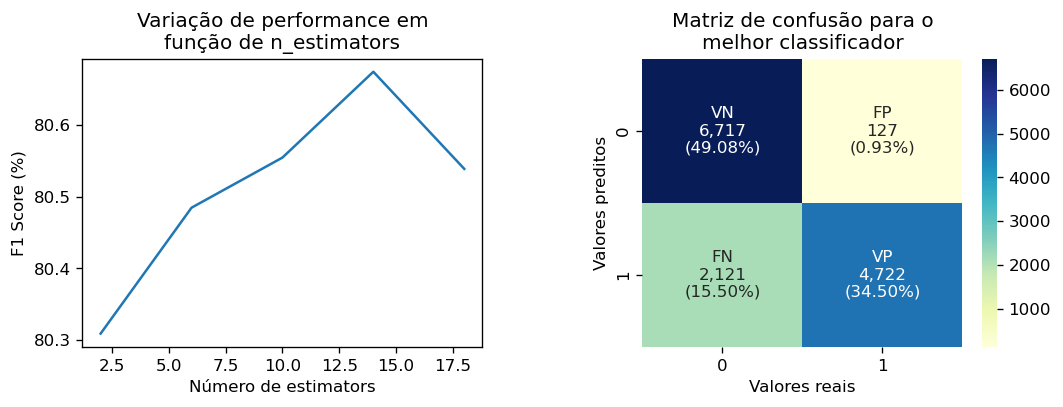

In [13]:
#    Gera estatísticas sobre a seleção dos n_estimators
# no algoritmo Bagging
knn_statistics = bagging_satistics(knn_bagging_history, X_test, y_test)

## _Base Estimator_: Árvore de decisão

In [14]:
#    Criação do classificador Árvore de Decisão e definição dos
# parâmetros a serem usados no RandomizedSearch
dt = DecisionTreeClassifier()

dt_param = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': np.arange(5, 30, 5),
    'min_samples_leaf': np.arange(1, 10, 2),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [15]:
#    Executa a busca aletória pelos melhores parâmetros
# do algoritmo de Árvore de Decisão
dt_search = RandomizedSearchCV(
    dt,
    dt_param,
    n_iter=5,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

dt_history = dt_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [16]:
#    Usando a melhor combinação de parâmetros encontrada
# na etapa anterior, varia o número de estimators
# no algoritmo esemble (Bagging)
dt_bagging_param = {
    'n_estimators': np.arange(2, 22, 4)
}

dt_bagging = BaggingClassifier(
    base_estimator=dt_search.best_estimator_,
    n_estimators=2,
    n_jobs=-1,
    verbose=8
)

dt_bagging_search = GridSearchCV(
    estimator=dt_bagging,
    param_grid=dt_bagging_param,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

dt_bagging_history = dt_bagging_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=16)]: Done   6 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.6s finished


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   6 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished


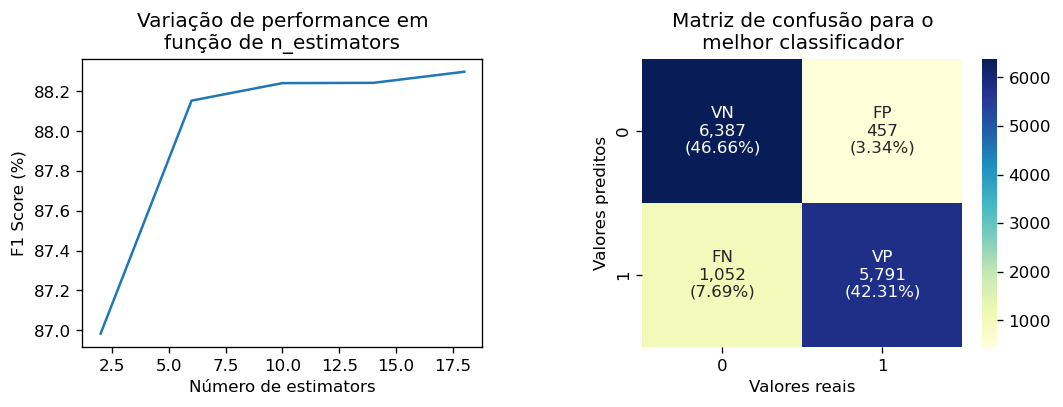

In [17]:
#    Gera estatísticas sobre a seleção dos n_estimators
# no algoritmo Bagging
dt_statistics = bagging_satistics(dt_bagging_history, X_test, y_test)

## _Base Estimator_: SVM

In [18]:
#    Criação do classificador SVM e definição dos
# parâmetros a serem usados no RandomizedSearch
svc = LinearSVC(dual=False)

svc_param = {
    'penalty': ['l1', 'l2'],
    'C': np.arange(1.0, 3.1, 0.5),
}

In [19]:
#    Executa a busca aletória pelos melhores parâmetros
# do algoritmo de SVM
svc_search = RandomizedSearchCV(
    svc,
    svc_param,
    n_iter=5,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

svc_history = svc_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [20]:
#    Usando a melhor combinação de parâmetros encontrada
# na etapa anterior, varia o número de estimators
# no algoritmo esemble (Bagging)
svc_bagging_param = {
    'n_estimators': np.arange(2, 22, 4)
}

svc_bagging = BaggingClassifier(
    base_estimator=svc_search.best_estimator_,
    n_estimators=2,
    n_jobs=-1,
    verbose=8
)

svc_bagging_search = GridSearchCV(
    estimator=svc_bagging,
    param_grid=svc_bagging_param,
    scoring='f1',
    n_jobs=-1,
    cv=2,
    verbose=8
)

svc_bagging_history = svc_bagging_search.fit(
    X_train,
    y_train
)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\Henrique\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    4.0s remaining:    9.4s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    4.1s remaining:    4.1s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    4.1s remaining:    1.7s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    4.1s finished


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


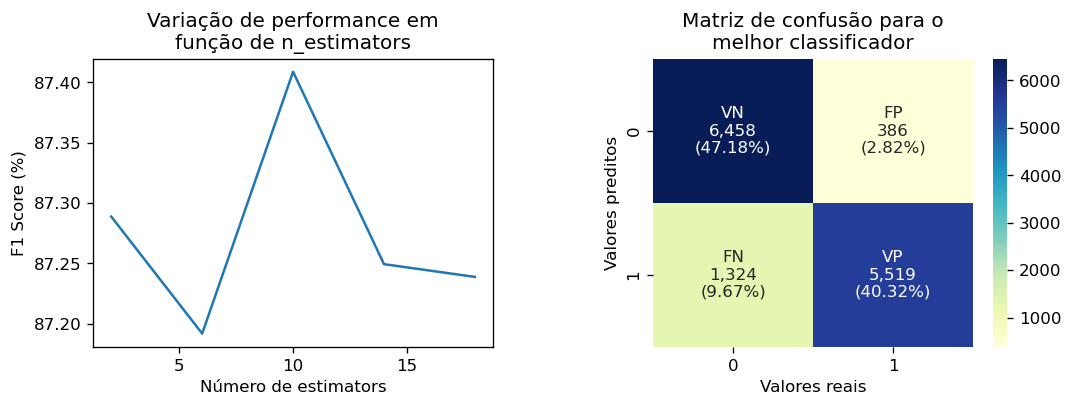

In [21]:
#    Gera estatísticas sobre a seleção dos n_estimators
# no algoritmo Bagging
svc_statistics = bagging_satistics(svc_bagging_history, X_test, y_test)

# Análise e comparação entre os três _base\_estimators_

In [22]:
statistics_dict = {
    'KNN': knn_statistics,
    'Árvore de Decisão': dt_statistics,
    'SVC': svc_statistics
}

In [23]:
statistics_dict.items()

dict_items([('KNN', {'Confusion Matrix': array([[6717,  127],
       [2121, 4722]], dtype=int64), 'Accuracy': 83.57565573171622, 'Precision': 97.3809032790266, 'Recall': 69.00482244629549, 'F1 Score': 80.77317824153269}), ('Árvore de Decisão', {'Confusion Matrix': array([[6387,  457],
       [1052, 5791]], dtype=int64), 'Accuracy': 88.97493972382553, 'Precision': 92.68565941101153, 'Recall': 84.62662574894053, 'F1 Score': 88.47299671530058}), ('SVC', {'Confusion Matrix': array([[6458,  386],
       [1324, 5519]], dtype=int64), 'Accuracy': 87.50639292759553, 'Precision': 93.46316680779, 'Recall': 80.65176092357153, 'F1 Score': 86.58613115782869})])

In [37]:
def statistics_comparison(statistics_dict):
    column_list = ['Algorithm', 'Metric', 'Value']
    df_statistics = pd.DataFrame(columns=column_list)
    for method, dict in statistics_dict.items():
        for metric, value in dict.items():
            if metric == 'Confusion Matrix':
                continue
            df_statistics = pd.concat(
                [df_statistics,
                pd.DataFrame(
                    data=[[method, metric, value]],
                    columns=column_list
                )],
                ignore_index=True
            )
    
    ax = sns.barplot(
        data=df_statistics,
        x='Metric',
        y='Value',
        hue='Algorithm',
        palette=sns.color_palette("YlGnBu", 3)
    )

    ax.legend(
        bbox_to_anchor=(0., 1.02, 1., .102),
        loc='lower left',
        ncol=3,
        mode="expand",
        borderaxespad=0.
    )

    # for container in ax.containers:
    #     ax.bar_label(container)

    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.1f'), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', 
            xytext = (0, 4), 
            textcoords = 'offset points'
        )

    return df_statistics
 

,Algorithm,Metric,Value
0,KNN,Accuracy,83.575656
1,KNN,Precision,97.380903
2,KNN,Recall,69.004822
3,KNN,F1 Score,80.773178
4,Árvore de Decisão,Accuracy,88.974940
5,Árvore de Decisão,Precision,92.685659
6,Árvore de Decisão,Recall,84.626626
7,Árvore de Decisão,F1 Score,88.472997
8,SVC,Accuracy,87.506393
9,SVC,Precision,93.463167


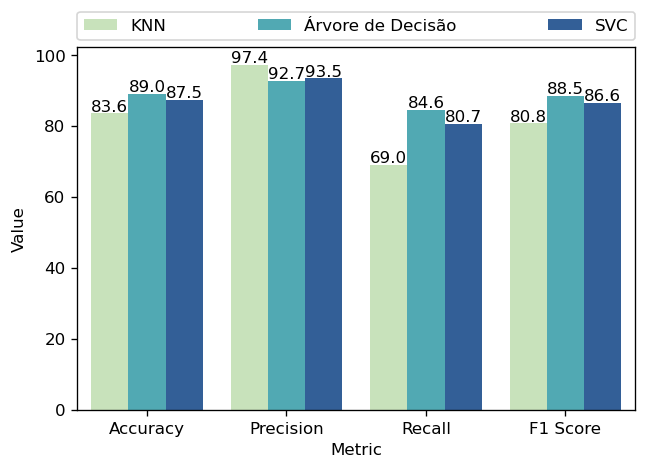

In [38]:
df_comparison = statistics_comparison(statistics_dict)
df_comparison

# Análise e conclusões


## Contextualização

Disponibilizado por Pytlak (2020) na plataforma Kaggle, o arquivo heart_2020_cleaned.csv contém dados pesquisados pelo CDC (*Centers for Disease Control and Prevention*) dos Estados Unidos no ano 2020 e contém informações aos principais indicadores chaves para doenças do coração, que são um dos principais motivos de falecimento hoje no mundo. 

A importância da pesquisa se dá pelo fato de aproximadamente metade dos norte-americanos possuírem pelo menos um dos principais fatores que levam a doenças do coração, sendo eles alta pressão sanguínea, colesterol elevado e uso de tabaco, Além desses, serão considerados outros fatores que também podem influenciar o aparecimento de doenças cardíacas, como diabetes, alto IMC, pouca atividade física ou consumo excessivo de álcool (PYTLAK, 2020).

Pelo alto impacto que os problemas cardíacos têm na população, o presente estudo buscou a análise desses indicadores chaves para detecção dessa doença usando algoritmos de Machine Learning.


## Dados

Os dados disponibilizados das 319.795 pessoas estão altamente desbalanceados, sendo mais de 91% da base composta por casos onde os pesquisados nunca tiveram doença cardíaca coronária ou infarto do miocárdio. Para contornar isso foi feita uma subamostragem da classe majoritária para que tanto ela quando a classe minoritária ficassem com 27.373 linhas.

Além disso foi feita a conversão dos dados binários com respostas em 'Yes' e 'No' para 1 e 0, respectivamente.

Por fim, nos casos onde o atributo era multiclasse como o de etnia, foram criadas variáveis "dummies" com respostas binárias para cada uma das classes.


## Metodologia

Com o objetivo de se testar diversas quantidades de base_estimators no Bagging e com diferentes algoritmos bases, foi seguida a seguinte sequência para a análise do desempenho deles:

1. Foram selecionados três algoritmos base para análise:
 - KNN: é escolhida a classe para um atributo com base na classe dos N atributos mais próximos a ele (usados cálculos de "distância" entre os atributos numéricos);
 - Árvore de Decisão: modelo tenta identificar regras de decisão baseado nos dados de entrada;
 - SVM: são traçados hiperplanos em um espaço N-dimensional que melhor dividem os dados de entrada nas classes da variável de saída.
 
2. Para cada um dos algorítmos, executou-se uma busca aleatória (5 iterações com 2 validações cruzadas cada) pelos melhores hiperparâmetros individuais.

3. O modelo com a melhor combinação de hiperparâmetros foi utilizado em um algoritmo de *Bagging* (são usados diferentes subconjuntos de dados de treinamentos para cada um dos *estimators* ). O *tuning* realizado aqui foi de uma busca exaustiva (GridSearchCV) variando-se em 4 unidades o parâmetro *n_estimator* de 2 a 18 (inclusive).


## Avaliação de desempenho dos modelos

Para os três algoritmos base usados, foram construídos o gráfico que mostra a variação da pontuação F1 em função dos *n_estimators* e a matriz de confusão para a predição com o maior valor de F1.

Para comparação entre o uso do KNN, da Árvore de Decisão e do SVM foi construído um gráfico com as seguintes métricas:

- Acurácia ( (TP+TN)/All ): porcentagem de quantidade geral de acertos;
- Precisão ( TP/(TP + FP) ): porcentagem de quantos indicados com doença cardíaca realmente possuem a doença;
- Revocação ( TP/(TP + FN)): porcentagem de quantas pessoas que possuem doença cardíaca foram de fato identificadas pelo modelo;
- F1 ( 2\*Precisão\*Revocação/(Precisão+Revocação) ): média harmônica entre precisão e revocação.

Como buscou-se construir um modelo com baixas quantidades de falso-positivos (pessoa não tem doença e o modelo acusa a condição cardíaca) e de falso-negativos (pessoa doente não é identificada pelo modelo), a pontuação F1 foi escolhida como critério para definição do *n_estimators*. Usando o mesmo critério para a escolha do melhor algoritmo base para o *Bagging*, tem-se que a Árvore de Decisão obteve o melhor resultado com F1 = 88,5%.

No caso hipotético de um local com recursos médicos extremamente limitados (disponibilidade de exames ou até mesmo de profissionais da saúde), poderia ser usado como algoritmo base o KNN já que ele é o que possui o valor mais alto de precisão, chegando a 97,4%. Assim quase todos os pacientes que o modelo indicasse a presença de problemas cardíacos realmente precisariam do acompanhamento médico.

Por outro lado o uso do KNN traz uma revocação muito baixa (69,0%), deixando de identificar muitas pessoas ainda com a doença. Para um modelo mais "conservador" que buscasse identificar a maior quantidade possível de pessoas com problemas no coração poderia ser utilizado novamente a Árvore de Decisão cuja revocação é igual a 84,6%.


## Conclusões

Por obter um melhor balanço entre revocação e precisão, o algoritmo base recomendado para o *Bagging* é o da Árvore de Decisão com um *n_estimators* igual a 18.

Como sugestão para alterações futuras pode-se analisar as demais métricas para a Árvore de Decisão com apenas 6 *n_estimators* já que a partir dessa quantidade não houve ganho significativo no F1 Score. Além disso, é possível verificar se os resultados ainda seriam semelhantes caso se usasse a técnica de superamostragem em vez da subamostragem para o balanceamento da classe *target*.


## Referências
[1] PYTLAK, Kamil. **Personal Key Indicators of Heart Disease**: 2020 annual cdc survey data of 400k adults related to their health status. 2020 annual CDC survey data of 400k adults related to their health status. 2020. Disponível em: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/. Acesso em: 14 mar. 2022.

